# 4.9.2 Intro to Data Visualization with Python

# Contents List

### 01 Importing Libraries

Create Path

### 02 Import Data 

Importing "orders_products_customer_merged.pkl"

### 03 Task

3) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

4) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

Mark outliers as missing

Make sample

Store 70% of the sample in the dataframe big

Store 30% of the sample in the dataframe small

Create sample df

Create line chart "Prices by Order Hour of Day"

Export "line_hour_price.png"

6) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

Create subset df

Create line chart "Number of Dependants by Age"

Export "line_age_dependants.png"

7) You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

Create subset df

Create line chart "Income by Age"

Export "scatterplot_age_income.png"

# 01 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path Import
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/4. Python/Instacart Basket Analysis 2023'

## 02 Importing Data

In [3]:
# df_merged import
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customer_merged.pkl'))

# 03 Task

## 3

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Frequency')

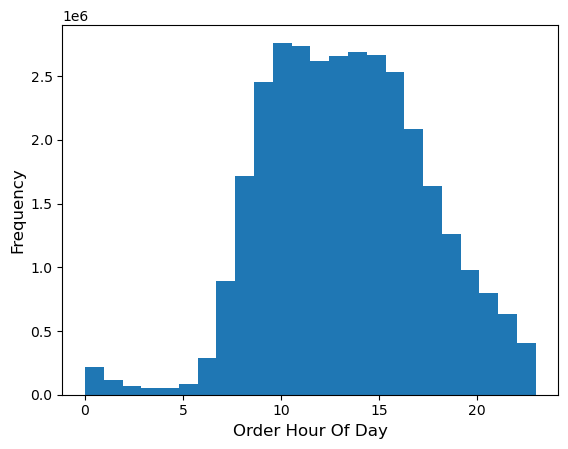

In [4]:
# histogram for order_hour_of_day
hist_order_hour_of_day = df_merged['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel("Order Hour Of Day", fontsize=12)
plt.ylabel("Frequency",fontsize=12)

Shows the busiest hours for placing orders, seperated into 24 bins to represent 24 hours in the day. Between 9am and 4pm is peak hours, between 1am and 6am are least busy hours. Additionally, after 4pm there is a steady decrease in orders.

In [5]:
# export histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_order_hour_of_day.png'))

## 4

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

Text(0.5, 1.0, 'Number of Orders by Loyalty')

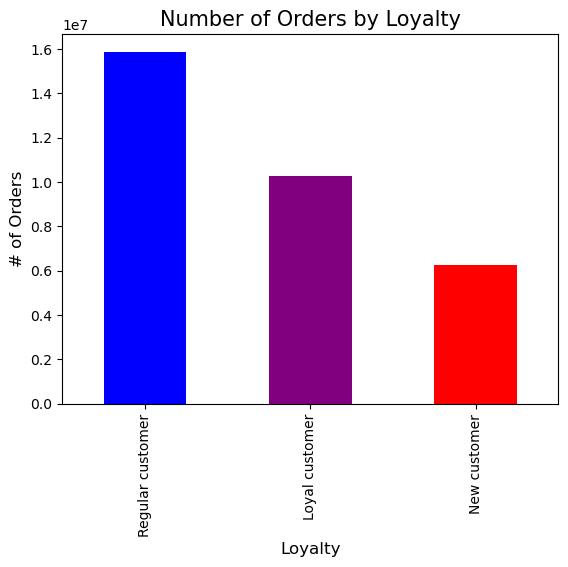

In [6]:
# create bar chart
bar_loyalty_flag = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'purple', 'red'])
plt.xlabel("Loyalty", fontsize=12)
plt.ylabel("# of Orders", fontsize=12)  
plt.title("Number of Orders by Loyalty", fontsize=15)

Shows that regular customers make the most orders

In [7]:
#export
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

## 5

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [8]:
# mark outliers as missing
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

In [9]:
# make sample
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [10]:
# store 70% of the sample in the dataframe big
big = df_merged[dev]

In [11]:
# store 30% of the sample in the dataframe small
small = df_merged[~dev] 

In [12]:
# checking size of merged
len(df_merged)

32404859

In [13]:
# confirming the size of big + small
len(big) + len(small)

32404859

In [14]:
# create sample df
df = small[['order_hour_of_day', 'prices']]

Text(0.5, 1.0, 'Prices by Order Hour of Day')

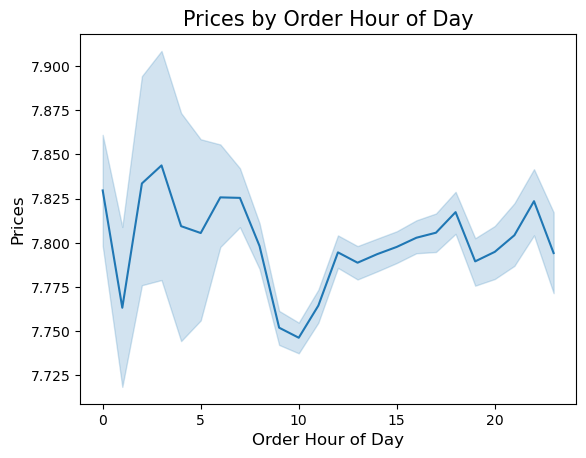

In [15]:
line_hour_price = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')
plt.xlabel("Order Hour of Day", fontsize=12)
plt.ylabel("Prices", fontsize=12)  
plt.title("Prices by Order Hour of Day", fontsize=15)

no correlation found, however 10am seems to have the lowest prices

In [16]:
# export line_hour_price
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_price.png'))

## 6

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [17]:
# create subset df
df_2 = small[['age', 'dependant_count']]

Text(0.5, 1.0, 'Number of Dependants by Age')

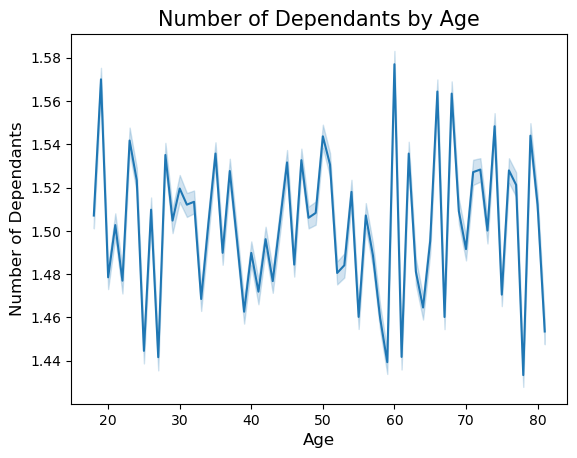

In [18]:
# create line chart
line_age_dependents = sns.lineplot(data = df_2, x = 'age', y = 'dependant_count')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Dependants", fontsize=12)  
plt.title("Number of Dependants by Age", fontsize=15)

Does not seem to be a correlation between age and number of dependants

In [19]:
# exporting line_age_dependants
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

## 7

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

In [20]:
# create subset df
df_3 = small[['age', 'income']]

Text(0.5, 1.0, 'Income by Age')

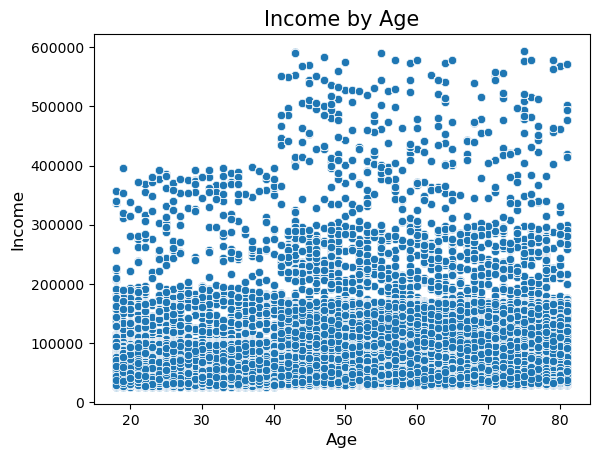

In [21]:
# create line chart for age and income
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_3)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Income", fontsize=12)  
plt.title("Income by Age", fontsize=15)

In [22]:
# export scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))